In [3]:
df = pd.read_csv("/Users/camerondavidson-pilon/Downloads/export_od_readings_raw.csv (1).dump.gz")

In [4]:
unit = 2

df = df.loc[df['morbidostat_unit'] == unit].copy()

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index("timestamp")

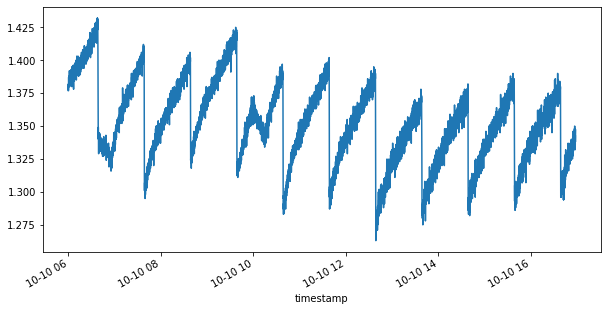

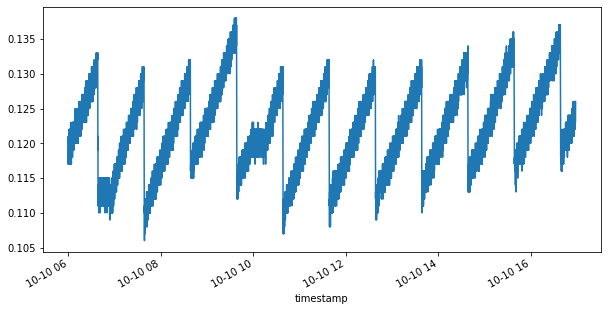

In [31]:
for _, g in df.groupby("angle"):
    plt.figure(figsize=(10,5))
    g['od_reading_v'].loc["2020-10-10 06":].plot()

In [39]:
from scipy.optimize import curve_fit


_135 = df.loc[df['angle'] == "90"]
od = _135.loc["2020-10-10 13:39":"2020-10-10 14:37"]['od_reading_v'].values

def expo(t, a, r):
    return a * np.exp(r * t)

curve_fit(expo, np.linspace(0, 1, od.shape[0]), od, p0=(1.3, 1.))

(array([0.11391853, 0.1497291 ]),
 array([[ 1.30634174e-08, -1.67784118e-07],
        [-1.67784118e-07,  2.80547949e-06]]))